In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris # iris dataset
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
from sklearn.decomposition import PCA


def EDA_pca(input_data, n_components) :
    # to do
    # 수치형 예외처리 생각해볼것
    if isinstance(input_data, pd.DataFrame) :
        input_data = input_data.values
    
    scaled_data = StandardScaler().fit_transform(input_data) # input_data scale
    
    ### PCA
    pca = PCA(n_components = n_components) # 주성분을 몇개로 할지 결정
    pca.fit(scaled_data)
    
    # scatter plot 관련
    components = pca.components_
    score_array = pca.transform(scaled_data)
    
    # standard_deviation 관련
    standard_deviation = pca.explained_variance_
    proportion_of_variance = pca.explained_variance_ratio_
    cum_proportion = np.cumsum(proportion_of_variance)
    
    return {'standard_deviation' : standard_deviation, 'proportion_of_variance' : proportion_of_variance, 'cum_proportion' : cum_proportion,'components' : components, 'score_array' : score_array}

In [3]:
iris = load_iris()
temp = pd.DataFrame(iris['data'])
temp.columns = iris['feature_names']
temp['target'] = iris['target']
temp.head()
df = temp

In [4]:
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # `종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
a = EDA_pca(x, 3)

In [6]:
import matplotlib.pyplot as plt

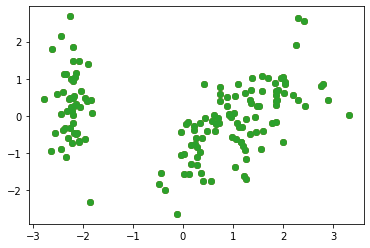

In [7]:
plt.scatter(a['score_array'][:,0], a['score_array'][:,1])
plt.scatter(a['score_array'][:,0], a['score_array'][:,1])
plt.scatter(a['score_array'][:,0], a['score_array'][:,1])
plt.show()

In [8]:
a['proportion_of_variance']

array([0.72962445, 0.22850762, 0.03668922])

In [9]:
a['standard_deviation']

array([2.93808505, 0.9201649 , 0.14774182])

In [10]:
a['standard_deviation']/a['standard_deviation'].sum()

array([0.73342264, 0.22969715, 0.03688021])